# First backtesting optimization analysis

In [1]:
from strategies import *
from optimization.genetic import optimize
from datetime import datetime

In [7]:
now = int(datetime.now().timestamp() * 1000)

results = optimize('binance', 'BTCUSDT', 'sma', '15m', 0, now, 60, 50)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [16:37<00:00, 19.95s/it]


In [8]:
results

[PNL = 145.03 Max. Drawdown = 16.12 Parameters = {'slow_ma': 194, 'fast_ma': 5} Rank = 0 Crowding Distance = inf,
 PNL = 167.7 Max. Drawdown = 16.64 Parameters = {'slow_ma': 192, 'fast_ma': 4} Rank = 0 Crowding Distance = 0.8298328907115231,
 PNL = 170.73 Max. Drawdown = 20.45 Parameters = {'slow_ma': 196, 'fast_ma': 3} Rank = 0 Crowding Distance = 0.5359522851524107,
 PNL = 170.74 Max. Drawdown = 30.38 Parameters = {'slow_ma': 193, 'fast_ma': 2} Rank = 0 Crowding Distance = 1.170167109288477,
 PNL = 182.47 Max. Drawdown = 46.35 Parameters = {'slow_ma': 51, 'fast_ma': 46} Rank = 0 Crowding Distance = inf,
 PNL = 138.63 Max. Drawdown = 16.23 Parameters = {'slow_ma': 185, 'fast_ma': 4} Rank = 1 Crowding Distance = inf,
 PNL = 163.93 Max. Drawdown = 17.0 Parameters = {'slow_ma': 196, 'fast_ma': 4} Rank = 1 Crowding Distance = 0.7408227336922132,
 PNL = 164.91 Max. Drawdown = 17.02 Parameters = {'slow_ma': 193, 'fast_ma': 4} Rank = 1 Crowding Distance = 0.05344015315561977,
 PNL = 164.99 M

## Show data

In [9]:
from plotly import graph_objects as go
import plotly.express as px
import pandas as pd

In [10]:
df = pd.DataFrame.from_records([r.__dict__ for r in results])
df['rank'] = df['rank'].astype(str)
df.head()

,pnl,max_dd,parameters,dominated_by,dominates,rank,crowding_distance
0,145.028996,16.116999,"{'slow_ma': 194, 'fast_ma': 5}",0,"[5, 12, 24, 25, 33, 43, 52, 60, 61, 62, 63, 64...",0,inf
1,167.700371,16.635263,"{'slow_ma': 192, 'fast_ma': 4}",0,"[6, 7, 8, 13, 14, 15, 16, 17, 20, 21, 22, 24, ...",0,0.829833
2,170.729234,20.450416,"{'slow_ma': 196, 'fast_ma': 3}",0,"[9, 10, 17, 18, 23, 30, 31, 32, 39, 40, 41, 42...",0,0.535952
3,170.738240,30.384299,"{'slow_ma': 193, 'fast_ma': 2}",0,"[18, 23, 32, 42, 51, 57, 58, 59, 60, 61, 63, 6...",0,1.170167
4,182.466321,46.347496,"{'slow_ma': 51, 'fast_ma': 46}",0,"[11, 19, 32, 60, 63, 68, 73, 74, 77, 78, 79, 8...",0,inf


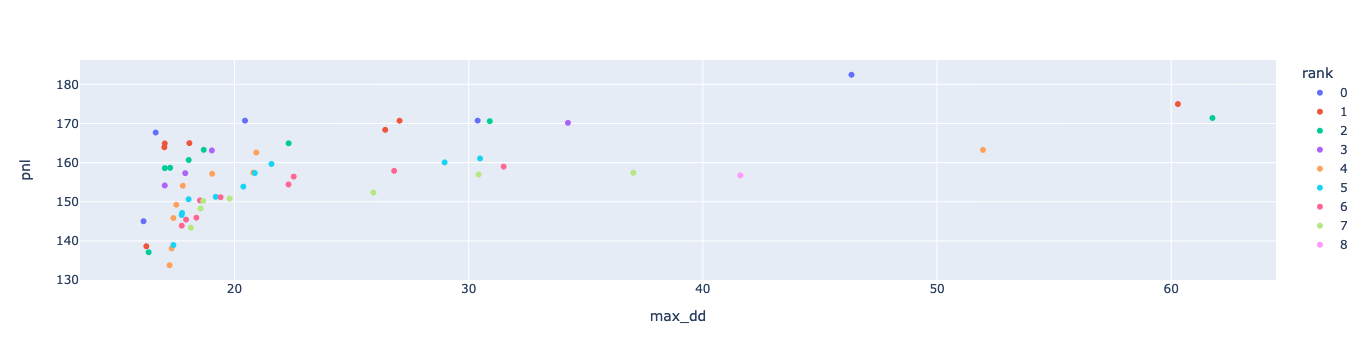

In [11]:
px.scatter(df, x='max_dd', y='pnl', color='rank')